<a href="https://colab.research.google.com/github/thecodeeagle/Genetic-Algorithm-Based-Ensemble-for-Driver-Distraction-Recognition/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary packages
import argparse

# Import necessary components to build LeNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization

from keras import optimizers
import tensorflow as tf

In [ ]:
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from PIL import Image
import cv2
train_images = []
train_labels = []
with open("drive/My Drive/distracted.driver/train.csv", 'r') as file:
  
  count =0
  for line in file:
    if count ==0: ## excluding first row
      count+=1
    if count>1:


      temp = (line.split(",")[0])
      
      print(count)
      img_path = "drive/My Drive" + (line.split(",")[0])
      #name = temp.split("/")
      #filename = name[2] + name[3]
        
      img = Image.open(img_path)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(int((line.split(",")[1]).split('\n')[0]))
    count+=1

In [ ]:
def resize_image(img, size=(112,112)):

    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    if dif > (size[0]+size[1])//2:
      interpolation = cv2.INTER_AREA 
    else:
      interpolation = cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]

    return cv2.resize(mask, size, interpolation)

In [ ]:
from PIL import Image
import numpy as np
import IPython.display as display
%matplotlib
import matplotlib.pyplot as plt
from pylab import imread,subplot,imshow,show
import cv2
test_images = []
test_labels = []
with open("drive/My Drive/distracted.driver/test.csv", 'r') as file:
  
  count =0
  for line in file:
    if count ==0: ## excluding first row
      count+=1
    if count>1:


      temp = (line.split(",")[0])
      
      print(count)
      img_path = "drive/My Drive" + (line.split(",")[0])
         
      img = cv2.imread(img_path)
      img_arr = np.array(img)  
      img_arr = resize_image(img_arr) 
      print(img_arr.shape)
    
      
    
    
      test_images.append(img_arr)
     
    count+=1

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from tensorflow.keras import datasets,models,layers

from keras.regularizers import l2
# Initialize model
alexnet = Sequential()
l2_reg=0.

# Layer 1
alexnet.add(Conv2D(96, (11, 11), input_shape=(224,224,3),padding='same', kernel_regularizer=l2(l2_reg)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))


# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))
# Layer 8
alexnet.add(Dense(10))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))
alexnet.compile(loss='categorical_crossentropy', metrics=['acc'],optimizer=optimizers.RMSprop(lr=1e-4))


        
    



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

import keras

In [ ]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
       
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "Training Loss")
            plt.plot(N, self.acc, label = "Training Accuracy")
            plt.title("Training Loss and Accuracy ")
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

In [ ]:
import numpy as np
loaded = np.load("drive/My Drive/newdriver.npz")
train_images = loaded["train_images"]
train_labels = loaded["train_labels"]

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

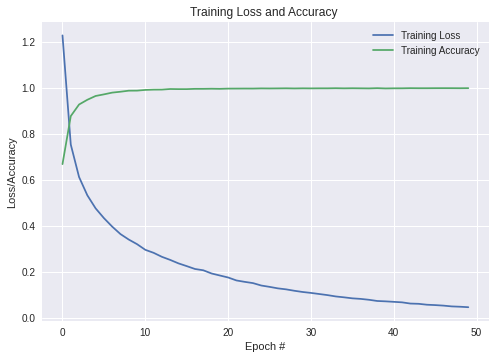

In [ ]:
history = alexnet.fit(train_images, train_labels, epochs = 50, batch_size = 64, callbacks=[plot_losses])

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_plot_labels = ['Safe Driving','Text Right','Phone Right', 'Text Left', 'Phone_Left','Adjust Radio', 'Drinking', 'Reaching Behind', 'Hair or Makeup', 'Talking to Passenger']
cm= confusion_matrix(y_true = test_labels, y_pred =np.argmax(y_pred, axis =1))

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize = True)


In [ ]:
(classification_report(test_labels,np.argmax(y_pred, axis = 1), target_names=cm_plot_labels))

'                      precision    recall  f1-score   support\n\n        Safe Driving       0.93      0.94      0.93       922\n          Text Right       0.94      0.97      0.95       326\n         Phone Right       0.98      0.96      0.97       341\n           Text Left       0.96      0.95      0.95       494\n          Phone_Left       0.98      0.94      0.96       306\n        Adjust Radio       0.95      0.96      0.96       305\n            Drinking       0.96      0.97      0.97       403\n     Reaching Behind       0.95      0.96      0.95       301\n      Hair or Makeup       0.99      0.94      0.96       290\nTalking to Passenger       0.95      0.97      0.96       643\n\n            accuracy                           0.95      4331\n           macro avg       0.96      0.96      0.96      4331\n        weighted avg       0.95      0.95      0.95      4331\n'

In [ ]:
test_images = loaded['test_images']
test_labels = loaded['test_labels']

In [ ]:
results = alexnet.evaluate(test_images, test)

144/144 [==============================] - 24s 170ms/step - loss: 0.3392 - accuracy: 0.9563


In [ ]:
alexnet.save("drive/My Drive/new_alexnet")

INFO:tensorflow:Assets written to: drive/My Drive/new_alexnet/assets
